# OpenSBLI Benchmark

This notebook compares the peformance of the OpenSBLI Taylor-Green vortex benchmark on different systems.

Performance is compared using iterations per second.

## Setup Section

In [22]:
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [23]:
import sys
sys.path.append('../../../python-modules')

In [24]:
from appanalysis import osbli

## Read data files

### ARCHER

In [25]:
archerfiles = {5:'../results/ARCHER/output_5nodes.txt',
               20:'../results/ARCHER/output_20nodes_201711250859.txt',
               40:'../results/ARCHER/output_40nodes_201711250903.txt',
               80:'../results/ARCHER/output_80nodes.txt',
               160:'../results/ARCHER/output_160nodes.txt',
               256:'../results/ARCHER/output_256nodes.txt',
               384:'../results/ARCHER/output_384nodes.txt',
               512:'../results/ARCHER/output_512nodes.txt',
               640:'../results/ARCHER/output_640nodes.txt',
               768:'../results/ARCHER/output_768nodes.txt',
               896:'../results/ARCHER/output_896nodes.txt',
               }

In [26]:
archercpn = 24
archernodes, archertime, archerperf = osbli.calcperf(archerfiles, archercpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              5             120            18.9                0.053
             20             480             4.7                0.213
             40             960             2.5                0.403
             80            1920             2.0                0.509
            160            3840             0.5                1.919
            256            6144             0.4                2.737
            384            9216             0.2                4.262
            512           12288             0.2                5.542
            640           15360             0.2                5.430
            768           18432             0.1                7.924
            896           21504             0.1                9.524


### Cirrus

In [27]:
cirrusfiles = {5:'../results/Cirrus/output_5nodes.txt',
               20:'../results/Cirrus/output_20nodes.txt',
               40:'../results/Cirrus/output_40nodes.txt',
               80:'../results/Cirrus/output_80nodes.txt',
               160:'../results/Cirrus/output_160nodes.txt',
               260:'../results/Cirrus/output_260nodes.txt'
               }

In [28]:
cirruscpn = 36
cirrusnodes, cirrustime, cirrusperf = osbli.calcperf(cirrusfiles, cirruscpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              5             180            18.8                0.053
             20             720             4.8                0.211
             40            1440             2.3                0.438
             80            2880             1.1                0.914
            160            5760             0.6                1.730
            260            9360             0.4                2.797


### Thomas

In [29]:
thomasfiles = {2:'../results/Thomas/output_2nodes_201803160902.txt',
               4:'../results/Thomas/output_4nodes_201803160944.txt',
               8:'../results/Thomas/output_8nodes_201803160954.txt',
               16:'../results/Thomas/output_16nodes_201803161020.txt'
               }

In [30]:
thomascpn = 24
thomasnodes, thomastime, thomasperf = osbli.calcperf(thomasfiles, thomascpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              2              48            74.0                0.014
              4              96            29.0                0.035
              8             192            15.5                0.064
             16             384             7.1                0.141


### Peta4-Skylake

In [31]:
csd3sfiles = {2:'../results/CSD3Skylake/output_2nodes_201801151114.txt',
              5:'../results/CSD3Skylake/output_5nodes_201801151132.txt',
              8:'../results/CSD3Skylake/output_8nodes_201801151056.txt',
              16:'../results/CSD3Skylake/output_16nodes_201801151054.txt',
              32:'../results/CSD3Skylake/output_32nodes_201801151040.txt',
             }

In [32]:
csd3scpn = 32
csd3snodes, csd3stime, csd3sperf = osbli.calcperf(csd3sfiles, csd3scpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              2              64            33.1                0.030
              5             160            13.9                0.072
              8             256             8.3                0.121
             16             512             4.1                0.241
             32            1024             2.1                0.471


### Tesseract

In [33]:
tessfiles = {2:'../results/Tesseract/output_2nodes_201805181307.txt',
             4:'../results/Tesseract/output_4nodes_201805181343.txt',
             8:'../results/Tesseract/output_8nodes_201805181400.txt',
             16:'../results/Tesseract/output_16nodes_201805181406.txt',
             32:'../results/Tesseract/output_32nodes_201805181539.txt',
             64:'../results/Tesseract/output_64nodes_201805211259.txt',
             128:'../results/Tesseract/output_128nodes_201805221026.txt',
             }

In [34]:
tesscpn = 24
tessnodes, tesstime, tessperf = osbli.calcperf(tessfiles, tesscpn)

          Nodes           Cores        Time (s) Performance (iter/s)
          =====           =====        ======== ====================
              2              48            53.4                0.019
              4              96            27.1                0.037
              8             192            15.3                0.065
             16             384             6.6                0.152
             32             768             3.6                0.277
             64            1536             1.8                0.571
            128            3072             0.9                1.103


## Plot performance

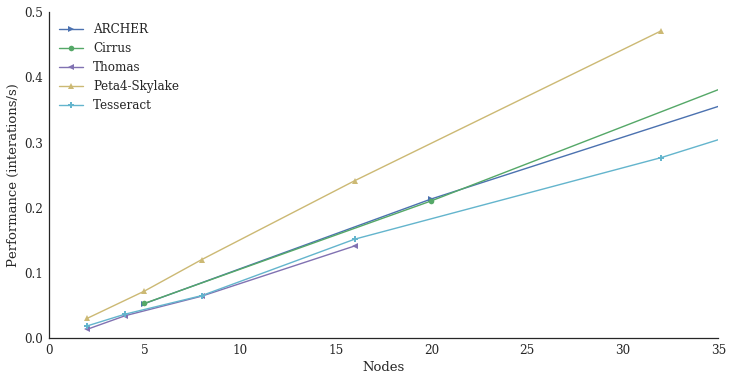

In [35]:
plt.plot(archernodes, archerperf, '>-', color=cols[0], label='ARCHER')
plt.plot(cirrusnodes, cirrusperf, 'o-', color=cols[1], label='Cirrus')
plt.plot(thomasnodes, thomasperf, '<-', color=cols[3], label='Thomas')
plt.plot(csd3snodes, csd3sperf, '^-', color=cols[4], label='Peta4-Skylake')
plt.plot(tessnodes, tessperf, 'P-', color=cols[5], label='Tesseract')
plt.xlim([0,35])
plt.ylim([0,0.5])
plt.xlabel('Nodes')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()
plt.savefig('osbli_tgv_perf.png', dpi=300)

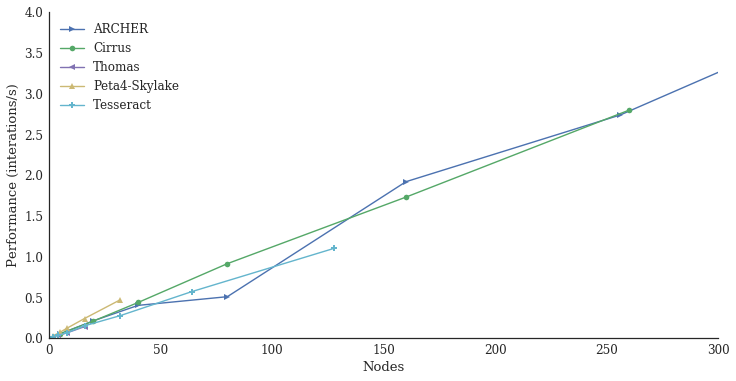

In [40]:
plt.plot(archernodes, [1/x for x in archertime], '>-', color=cols[0], label='ARCHER')
plt.plot(cirrusnodes, [1/x for x in cirrustime], 'o-', color=cols[1], label='Cirrus')
plt.plot(thomasnodes, [1/x for x in thomastime], '<-', color=cols[3], label='Thomas')
plt.plot(csd3snodes, [1/x for x in csd3stime], '^-', color=cols[4], label='Peta4-Skylake')
plt.plot(tessnodes, [1/x for x in tesstime], 'P-', color=cols[5], label='Tesseract')
plt.xlim([0,300])
plt.ylim([0,4])
plt.xlabel('Nodes')
plt.ylabel('Performance (interations/s)')
plt.legend(loc='best')
sns.despine()
plt.savefig('osbli_tgv_perf_large.png', dpi=300)

## Compare performance

In [37]:
nperf = {}
cperf = {}
nperf['ARCHER'] = archertime[0]
cperf['ARCHER'] = archertime[0]/(archercpn)
nperf['Cirrus'] = cirrustime[0]
cperf['Cirrus'] = cirrustime[0]/(cirruscpn)
nperf['Peta4-Skylake'] = csd3stime[1]
cperf['Peta4-Skylake'] = csd3stime[1]/(csd3scpn)

print("Performance improvement relative to ARCHER:\n")
print("{:>15s} {:>15s} {:>15s}".format('System', 'Iter. Time (s)', 'Improvement'))
print("{:>15s} {:>15s} {:>15s}".format('======', '==============', '==========='))
print("5-node")
for system in sorted(nperf):
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, nperf[system], nperf['ARCHER']/nperf[system]))

print("per-core")
for system in sorted(cperf):
    print("{:>15s} {:>15.3f} {:>15.3f}".format(system, cperf[system], cperf['ARCHER']/cperf[system]))

Performance improvement relative to ARCHER:

         System  Iter. Time (s)     Improvement
         ======  ==============     ===========
5-node
         ARCHER          18.898           1.000
         Cirrus          18.780           1.006
  Peta4-Skylake          13.859           1.364
per-core
         ARCHER           0.787           1.000
         Cirrus           0.522           1.509
  Peta4-Skylake           0.433           1.818
